## Selecting Best Titles

### A. Clustering Best Titles

In [2]:
import pandas as pd

data_anime = pd.read_csv("RawAnimeData.csv")
data_anime = data_anime.drop(columns=["Unnamed: 0"])
data_anime = data_anime.drop_duplicates(subset=["jp_title"])
data_anime = data_anime.dropna()
data_anime.head()

,year,season,jp_title,img,Japanese,Episodes,Starting,Ending,Producers,Studios,Main Studio,Source,Age Rating,Rating Score,Reviewers,Rating Score Rank,Popularity Rank,Members,Favorites
0,2021,winter,Jujutsu Kaisen,https://cdn.myanimelist.net/images/anime/1171/...,呪術廻戦,24,3 Oct 2020,27 Mar 2021,"Mainichi Broadcasting System, TOHO animation, ...",MAPPA,MAPPA,Manga,R - 17+ (violence & profanity),8.56,1.809780e+13,110,13.0,2755845,93161
1,2021,winter,Yuru Camp△ Season 2,https://cdn.myanimelist.net/images/anime/1255/...,ゆるキャン△ SEASON2,13,7 Jan 2021,1 Apr 2021,"Half H.P Studio, MAGES., DeNA",C-Station,C-Station,Manga,PG-13 - Teens 13 or older,8.50,1.052540e+11,145,1091.0,238832,3105
2,2021,winter,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,https://cdn.myanimelist.net/images/anime/1724/...,Re：ゼロから始める異世界生活,12,6 Jan 2021,24 Mar 2021,"AT-X, Memory-Tech, Hakuhodo DY Music & Picture...",White Fox,White Fox,Light novel,R - 17+ (violence & profanity),8.43,5.687810e+11,180,183.0,969121,13012
3,2021,winter,Mushoku Tensei: Isekai Ittara Honki Dasu,https://cdn.myanimelist.net/images/anime/1530/...,無職転生 ～異世界行ったら本気だす～,11,11 Jan 2021,22 Mar 2021,"Frontier Works, TOHO, Magic Capsule, TOHO anim...",Studio Bind,Studio Bind,Light novel,R - 17+ (violence & profanity),8.36,8.876810e+11,227,95.0,1438841,36751
4,2021,winter,Tensei shitara Slime Datta Ken 2nd Season,https://cdn.myanimelist.net/images/anime/1271/...,転生したらスライムだった件,12,12 Jan 2021,30 Mar 2021,Kodansha,8bit,8bit,Manga,PG-13 - Teens 13 or older,8.36,5.985960e+11,231,161.0,1033610,10879


In [3]:
data_anime = data_anime[["jp_title", "Main Studio", "Episodes", "Rating Score", "Rating Score Rank", "Popularity Rank", "Members", "Favorites", "Reviewers"]]
data_anime.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11


In [4]:
import numpy as np
import matplotlib.pyplot as plt

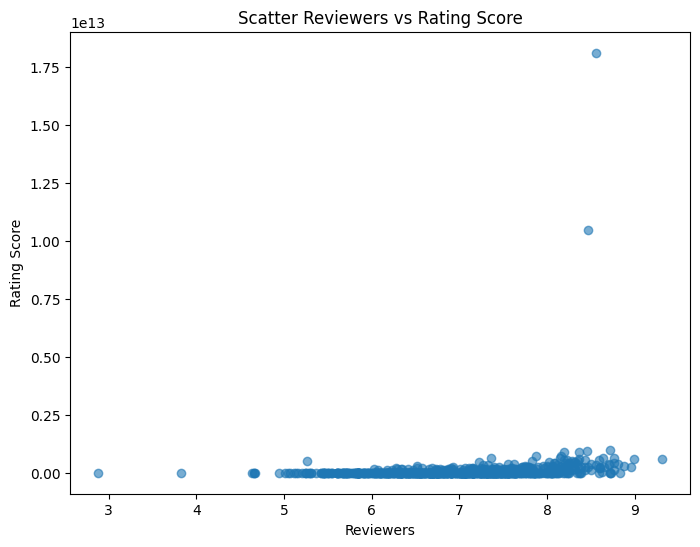

In [5]:
plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("Reviewers")
plt.ylabel("Rating Score")

scatter = plt.scatter(
    x=data_anime["Rating Score"], 
    y=data_anime["Reviewers"], 
    alpha=0.6
);

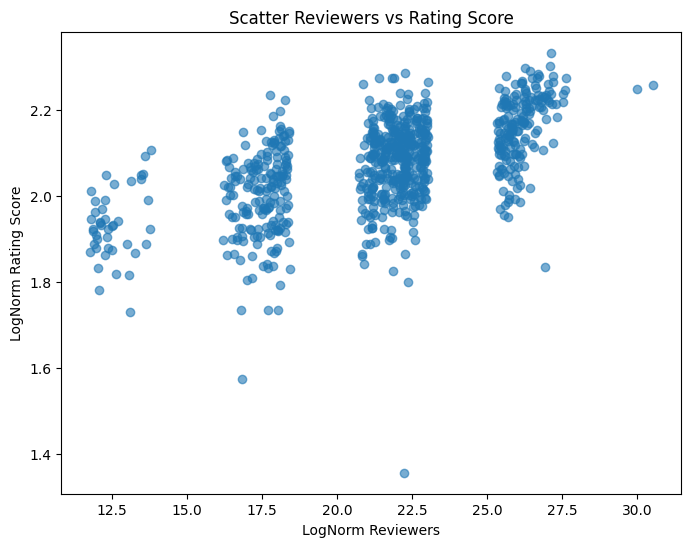

In [6]:
# Log Normal Transformation to Easily Spot the Differences
data_anime['log_norm_rating'] = np.log1p(data_anime['Rating Score'])
data_anime['log_norm_reviewers'] = np.log1p(data_anime['Reviewers'])

plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    alpha=0.6
);

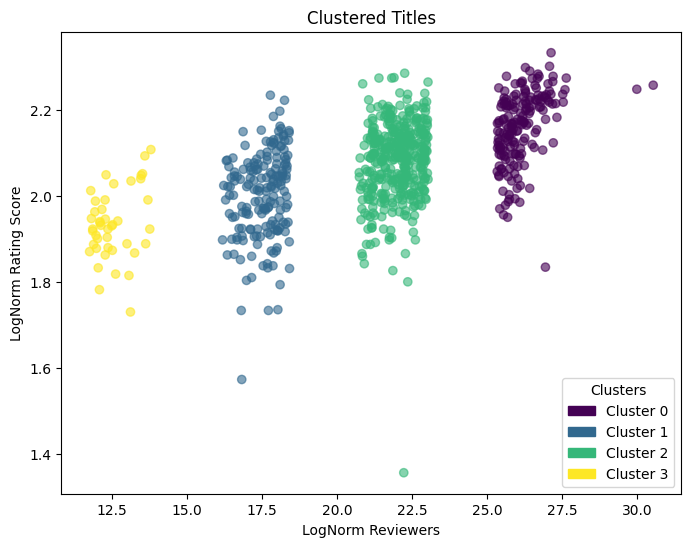

In [7]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

cluster_features = ["log_norm_rating", "log_norm_reviewers"]

n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
data_anime["Cluster"] = kmeans.fit_predict(data_anime[cluster_features])

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")


scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Cluster"],  
    cmap='viridis', 
    alpha=0.6
)

handles = [Patch(color=scatter.cmap(scatter.norm(c)), label=f"Cluster {c}") 
           for c in np.unique(data_anime["Cluster"])]
plt.legend(handles=handles, title="Clusters", loc="lower right")

plt.show()

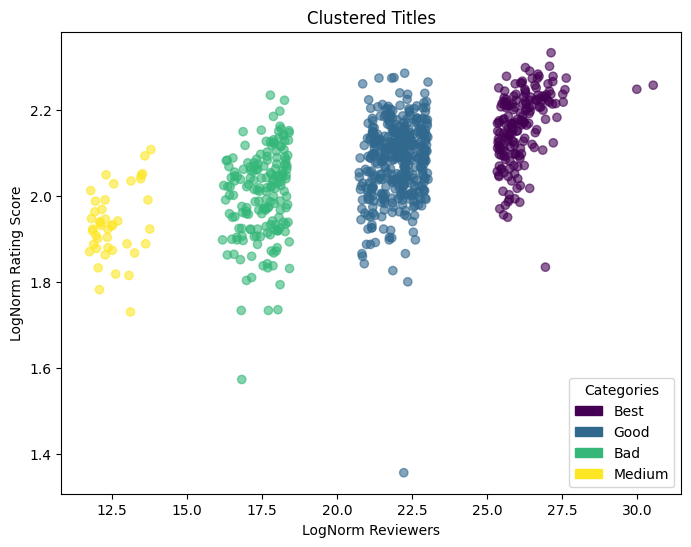

In [8]:
import matplotlib.patches as mpatches

data_anime['Category'] = data_anime['Cluster'].replace({0: 'Best', 1: 'Bad', 2: 'Good', 3: "Medium"})

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

categories = data_anime["Category"].unique()
color_map = {cat: i for i, cat in enumerate(categories)}

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Category"].map(color_map), 
    cmap='viridis', 
    alpha=0.6
)

legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cat) for cat, i in color_map.items()]

plt.legend(handles=legend_handles, title="Categories", loc="lower right")
plt.show()

In [9]:
pd.pivot_table(data_anime, values="Rating Score", index="Category", aggfunc="mean")

,Rating Score
Category,
Bad,6.443389
Best,7.704333
Good,7.041566
Medium,5.936512


In [10]:
data_best = data_anime.loc[data_anime['Category'] == 'Best']
data_best.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11,2.251292,25.379642,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11,2.236445,27.117853,0,Best


In [11]:
value = ["Reviewers", "Rating Score"]
# value = ["log_norm_rating", "log_norm_reviewers"]

# top 5
pivot_studio = pd.pivot_table(
    data_best, values=value, index="Main Studio", aggfunc="mean"
).sort_values(by=value, ascending=False).head(5)

pivot_studio

,Rating Score,Reviewers
Main Studio,,
MAPPA,8.388333,3.442926e+12
Wit Studio,8.330000,2.381146e+12
ufotable,8.342500,5.986010e+11
White Fox,8.430000,5.687810e+11
Studio Bind,8.415000,5.382620e+11


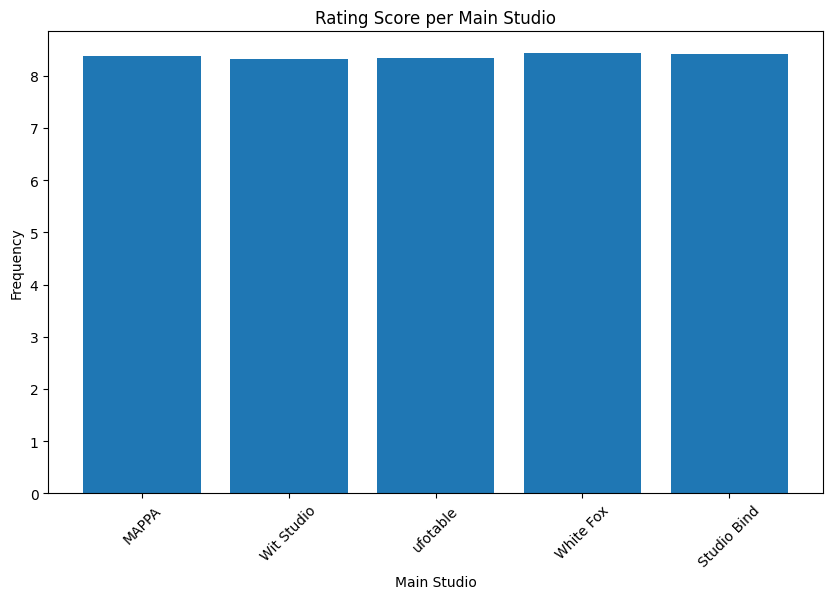

In [12]:
# Rating Score
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Rating Score"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Rating Score per Main Studio")
plt.xticks(rotation=45)
plt.show();

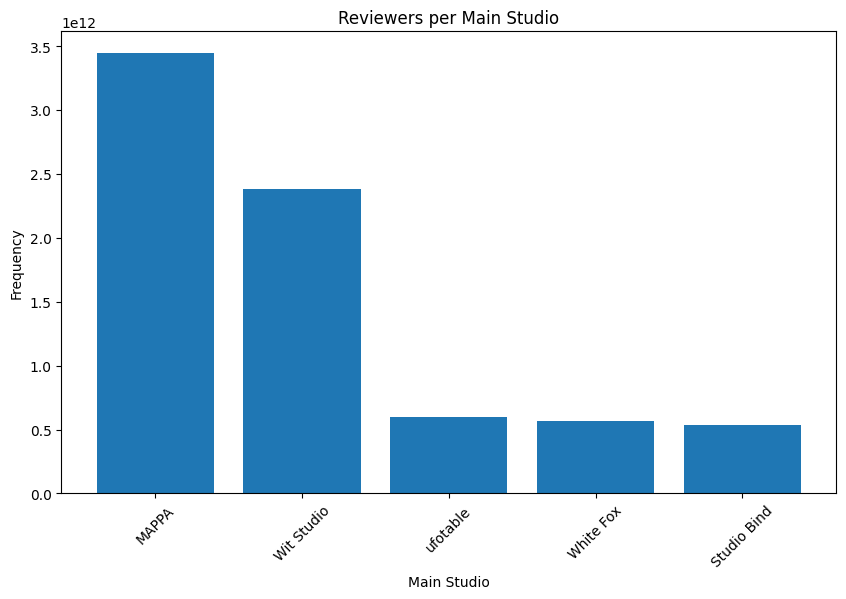

In [13]:
#  Reviewers
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Reviewers"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Reviewers per Main Studio")
plt.xticks(rotation=45)
plt.show();

In [14]:
selected_studio = pivot_studio.index.values
print("The selected studio is:", selected_studio)

The selected studio is: ['MAPPA' 'Wit Studio' 'ufotable' 'White Fox' 'Studio Bind']


# Color Analysis

In [15]:
selected_dataset = data_best.loc[data_best['Main Studio'].isin(selected_studio)]

selected_dataset.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
73,Vivy: Fluorite Eye's Song,Wit Studio,13,8.39,205,412.0,570600,11140,2.569810e+11,2.239645,26.272268,0,Best
185,Mushoku Tensei: Isekai Ittara Honki Dasu Part 2,Studio Bind,12,8.64,80,165.0,1016877,18964,6.369510e+11,2.265921,27.179959,0,Best


After we get the best title based on the "best" studio category

In [16]:
from ast import literal_eval

data_char = pd.read_csv("ColoredCharacterDataset.csv")
data_char = data_char.drop(columns=["Unnamed: 0"])

selected_char = data_char.loc[data_char['jp_title'].isin(selected_dataset['jp_title'].tolist())].copy()
selected_char = selected_char.reset_index(drop=True)

selected_char['colors'] = selected_char['colors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

selected_char.head()

,jp_title,char_name,fav,img,colors
0,Mushoku Tensei: Isekai Ittara Honki Dasu,Rudeus Greyrat (ルーデウス・グレイラット),10221,https://cdn.myanimelist.net/images/characters/...,"[[221, 234, 246], [179, 215, 251], [140, 207, ..."
1,Mushoku Tensei: Isekai Ittara Honki Dasu,Roxy Migurdia (ロキシー・ミグルディア),9320,https://cdn.myanimelist.net/images/characters/...,"[[215, 231, 239], [182, 206, 247], [162, 196, ..."
2,Mushoku Tensei: Isekai Ittara Honki Dasu,Eris Boreas Greyrat (エリス・ボレアス・グレイラット),6158,https://cdn.myanimelist.net/images/characters/...,"[[202, 236, 253], [178, 224, 253], [205, 217, ..."
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Sylphiette (シルフィエット),3018,https://cdn.myanimelist.net/images/characters/...,"[[216, 233, 243], [185, 221, 251], [172, 209, ..."
4,Mushoku Tensei: Isekai Ittara Honki Dasu,Orsted (オルステッド),769,https://cdn.myanimelist.net/images/characters/...,"[[143, 176, 246], [133, 167, 243], [138, 161, ..."


In [17]:
all_colors = np.array([color for sublist in selected_char['colors'] if isinstance(sublist, list) for color in sublist])

print("Number of character:", len(selected_char['colors'])) 
print("Expected shape:", (len(selected_char['colors'])*30, 3))
print("Real shape:", all_colors.shape)
print("Flatten:", 9240*3)

Number of character: 120
Expected shape: (3600, 3)
Real shape: (3600, 3)
Flatten: 27720


In [18]:
df_rgb = pd.DataFrame(all_colors, columns=['R', 'G', 'B'])

In [ ]:
def classify_color(r, g, b):
    """Classifies an RGB color into a general color category."""
    
    # Normalize RGB values
    r_norm, g_norm, b_norm = r / 255.0, g / 255.0, b / 255.0
    max_val = max(r_norm, g_norm, b_norm)
    min_val = min(r_norm, g_norm, b_norm)
    delta = max_val - min_val  # Color difference

    # Identify grayscale colors
    if max_val < 0.15:
        return "Black"
    elif min_val > 0.85:
        return "White"
    elif delta < 0.10:
        return "Gray"

    # Calculate hue value in degrees
    if delta == 0:
        hue = 0
    elif max_val == r_norm:
        hue = ((g_norm - b_norm) / delta) % 6
    elif max_val == g_norm:
        hue = ((b_norm - r_norm) / delta) + 2
    else:
        hue = ((r_norm - g_norm) / delta) + 4
    hue *= 60  # Convert to degrees

    # General color classification
    if 0 <= hue < 30 or 330 <= hue <= 360:
        return "Red"
    elif 30 <= hue < 60:
        return "Orange"
    elif 60 <= hue < 90:
        return "Yellow"
    elif 90 <= hue < 150:
        return "Green"
    elif 150 <= hue < 210:
        return "Cyan"
    elif 210 <= hue < 270:
        return "Blue"
    elif 270 <= hue < 330:
        return "Purple"
    
    return "Unknown"


# Apply classification to dataset
df_rgb['Color Category'] = df_rgb.apply(lambda row: classify_color(row['R'], row['G'], row['B']), axis=1)

df_rgb.head()

,R,G,B,Color Category
0,221,234,246,White
1,179,215,251,Blue
2,140,207,241,Cyan
3,166,193,219,Cyan
4,171,180,189,Gray


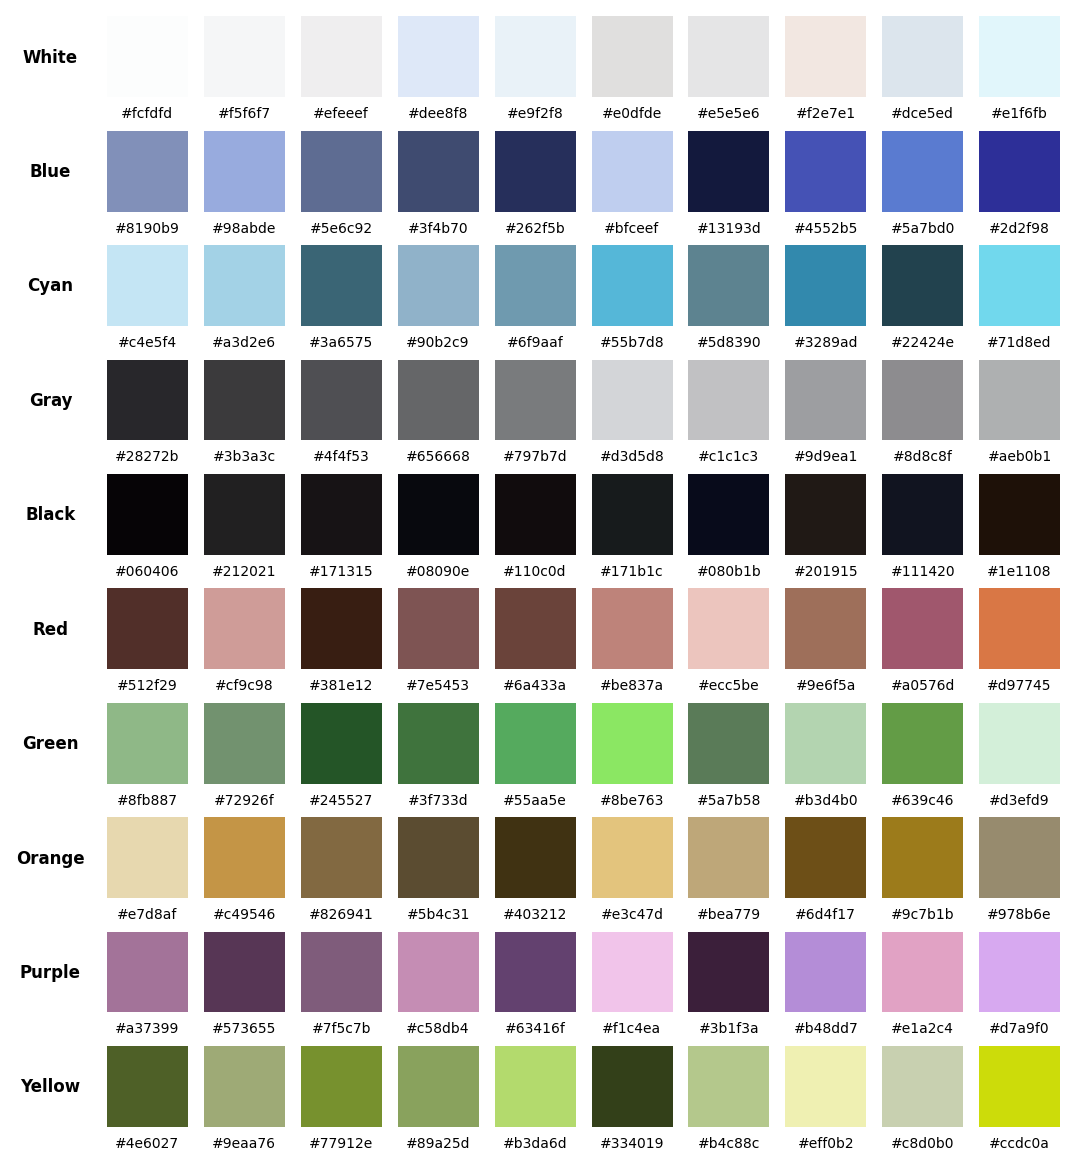

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

container = {}

for color in df_rgb['Color Category'].unique():
    # Extract RGB values for the current color category
    data = df_rgb.loc[df_rgb['Color Category'] == color].to_numpy()[:, :-1].astype(float)
    n_samples = data.shape[0]

    if n_samples > 1:
        # Dynamically set clusters based on available data
        n_clusters = min(n_samples, 10)
        
        # Initialize and fit KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        kmeans.fit(data)

        # Get cluster sizes and sort centers by frequency
        cluster_counts = Counter(kmeans.labels_)
        sorted_centers = sorted(kmeans.cluster_centers_, 
                              key=lambda x: -cluster_counts[np.where((kmeans.cluster_centers_ == x).all(axis=1))[0][0]])
        
        colors_to_display = np.array(sorted_centers)
    else:
        colors_to_display = data

    # Store original values before normalization
    container[color] = colors_to_display.copy()

# Normalize colors for visualization
for key in container:
    container[key] /= 255.0

# Determine the maximum number of colors in any category
max_colors = max(len(colors) for colors in container.values())

# Create figure
fig, ax = plt.subplots(len(container), max_colors + 1, figsize=(15, len(container) * 1.5))
fig.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1)

for row, (color_name, color_values) in enumerate(container.items()):
    # Display category name on the left
    ax[row, 0].text(0.5, 0.5, color_name, fontsize=12, ha='center', va='center', fontweight='bold')
    ax[row, 0].axis('off')
    
    # Display color swatches
    for col in range(max_colors):
        ax[row, col + 1].axis('off')
        if col < len(color_values):
            ax[row, col + 1].imshow([[color_values[col]]])
            
            # Convert RGB to hex
            rgb = (color_values[col] * 255).astype(int)
            hex_color = "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])
            
            # Display hex code at the top
            ax[row, col + 1].text(0.5, -0.2, hex_color, fontsize=10, ha='center', va='center', transform=ax[row, col + 1].transAxes)

plt.show()


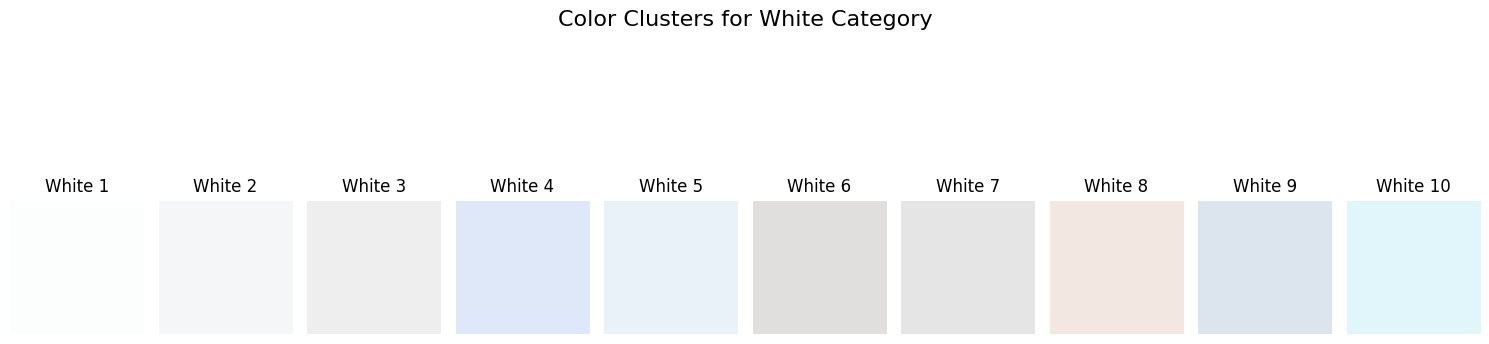

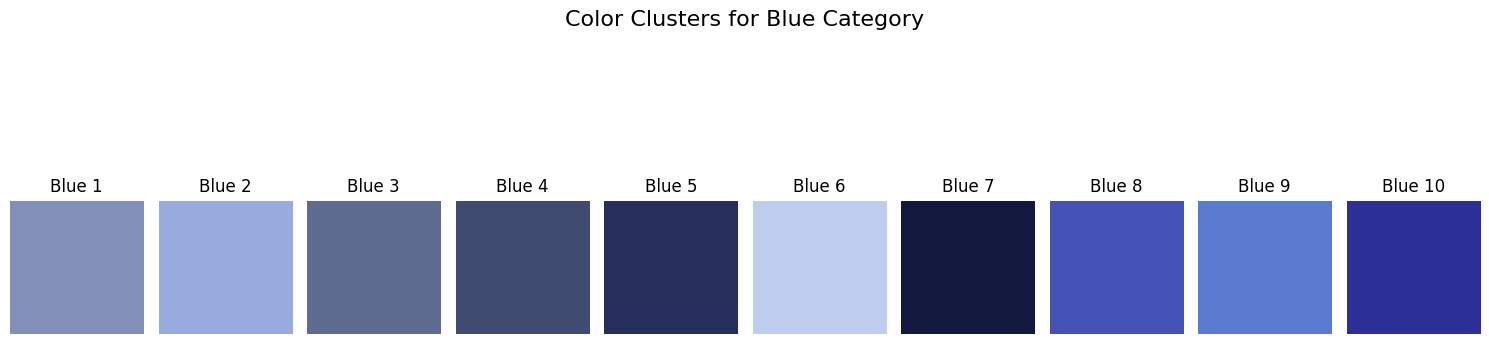

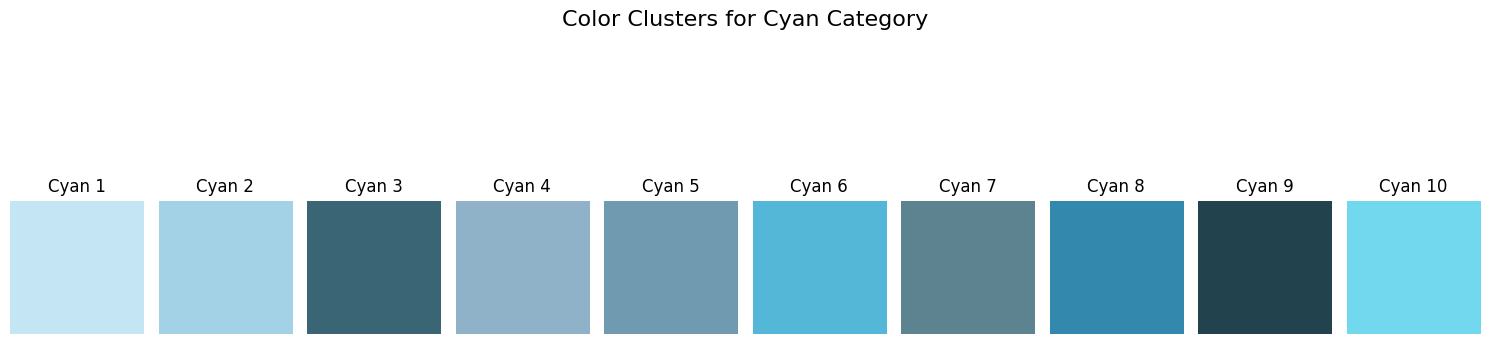

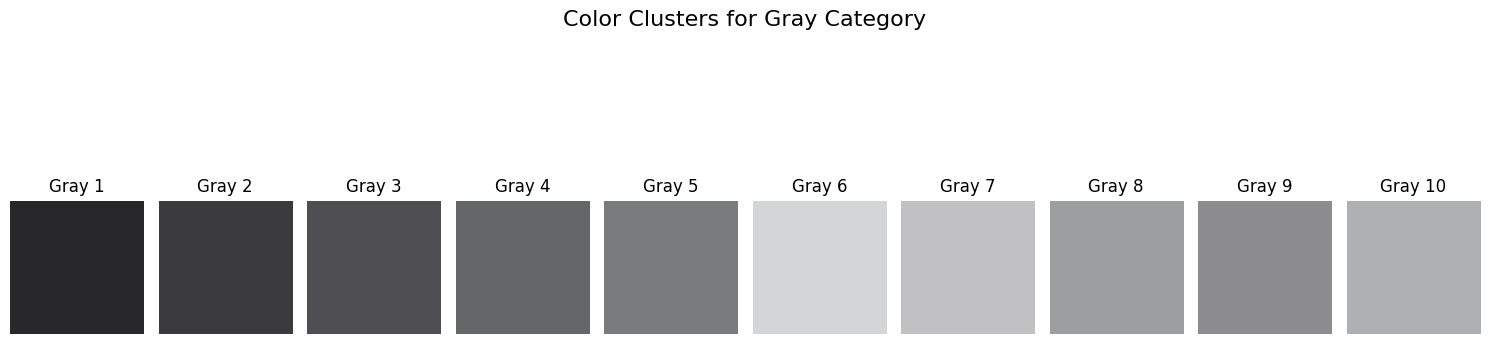

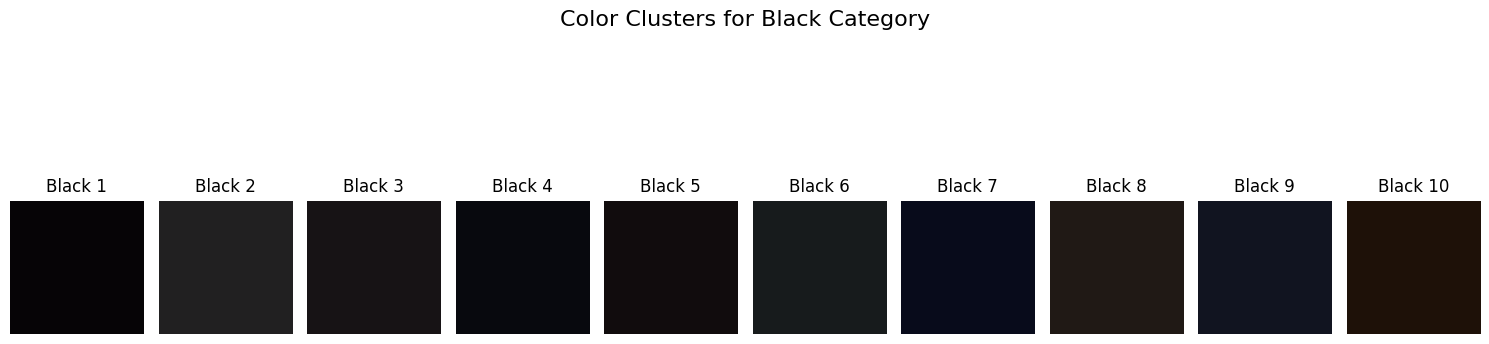

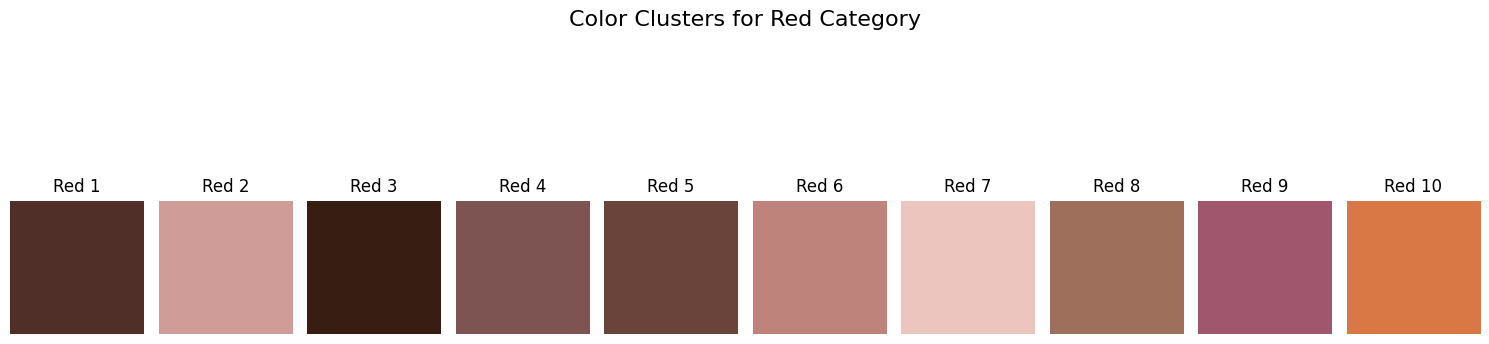

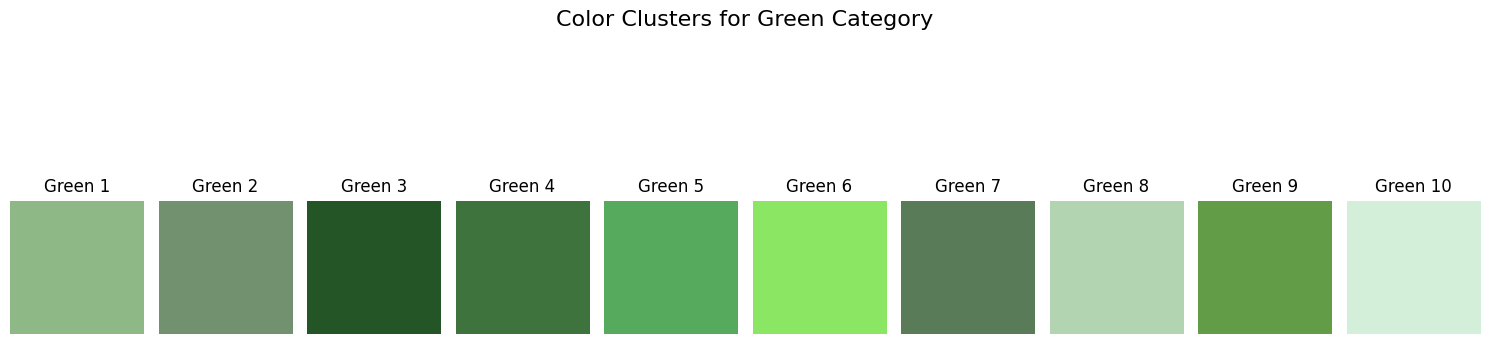

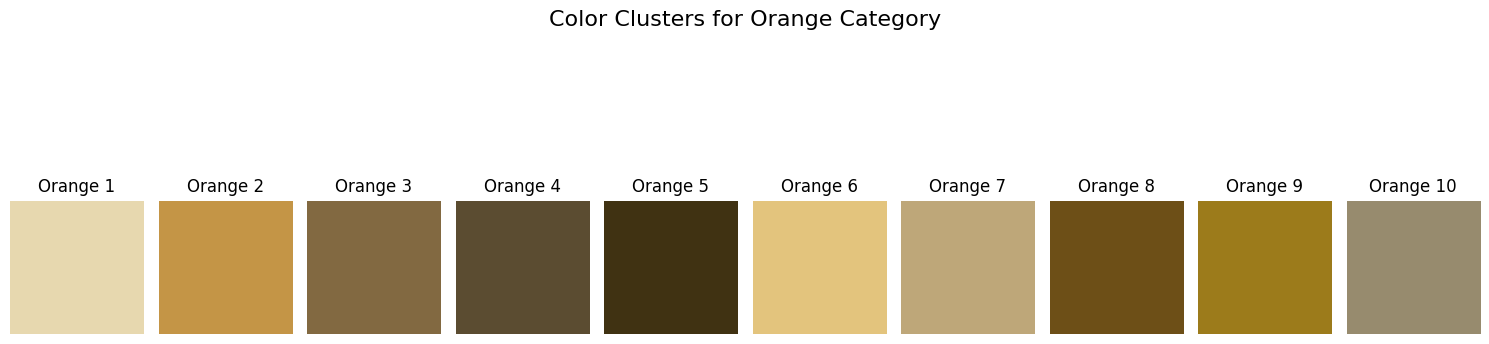

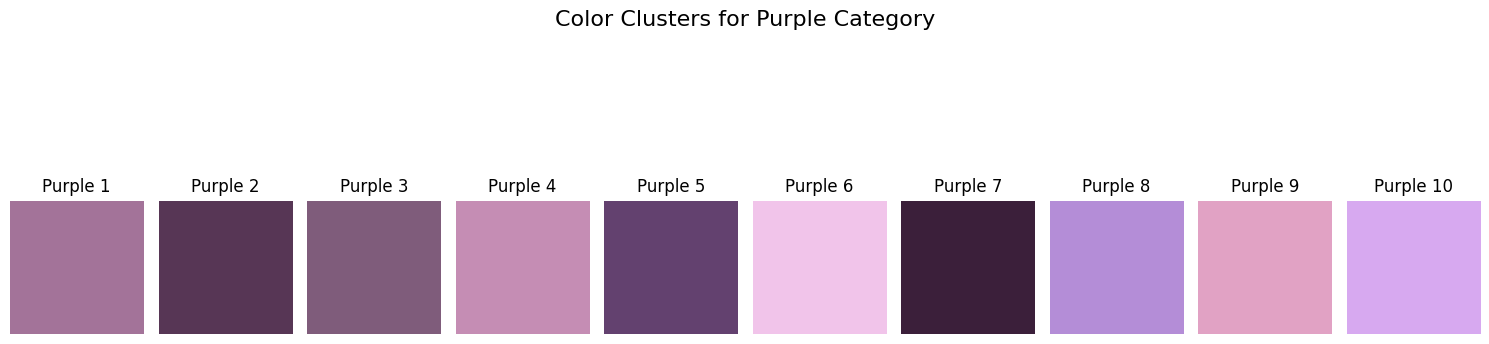

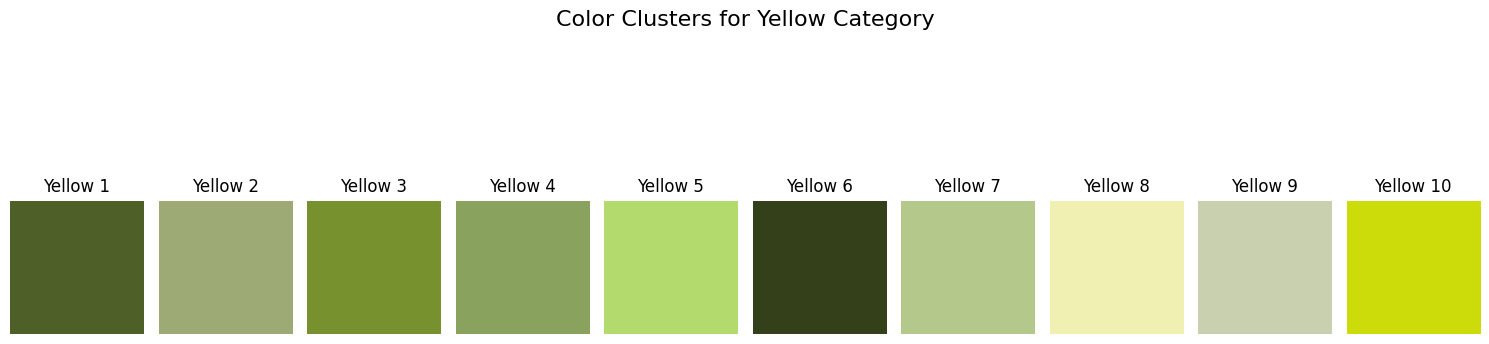

In [ ]:
# separated plot

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

container = {}

for color in df_rgb['Color Category'].unique():
    # Extract RGB values for the current color category
    data = df_rgb.loc[df_rgb['Color Category'] == color].to_numpy()[:, :-1].astype(float)
    n_samples = data.shape[0]

    if n_samples > 1:
        # Dynamically set clusters based on available data
        n_clusters = min(n_samples, 10)
        
        # Initialize and fit KMeans with cluster count validation
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        kmeans.fit(data)

        # Get cluster sizes and sort centers by frequency
        cluster_counts = Counter(kmeans.labels_)
        sorted_centers = sorted(kmeans.cluster_centers_, 
                              key=lambda x: -cluster_counts[np.where((kmeans.cluster_centers_ == x).all(axis=1))[0][0]])
        
        colors_to_display = np.array(sorted_centers)
    else:
        # Handle single-sample case directly
        colors_to_display = data

    # Store original values before normalization
    container[color] = colors_to_display.copy()
    
    # Normalize for visualization
    colors_to_display /= 255.0

    # Create appropriate number of subplots
    n_colors = len(colors_to_display)
    fig, axes = plt.subplots(1, n_colors, figsize=(15, 5))
    fig.suptitle(f'Color Clusters for {color} Category', fontsize=16)

    # Handle single-subplot case
    if n_colors == 1:
        axes = [axes]

    # Create color swatches
    for i, color_arr in enumerate(colors_to_display):
        axes[i].imshow([[color_arr]])
        axes[i].axis('off')
        axes[i].set_title(f'{color} {i+1}')
    plt.tight_layout()
    plt.show()

Cluster Labels and Counts: [0 1 2 3 4 5 6 7 8 9] [ 66 122 131 107 117 119  56  83  64 120]


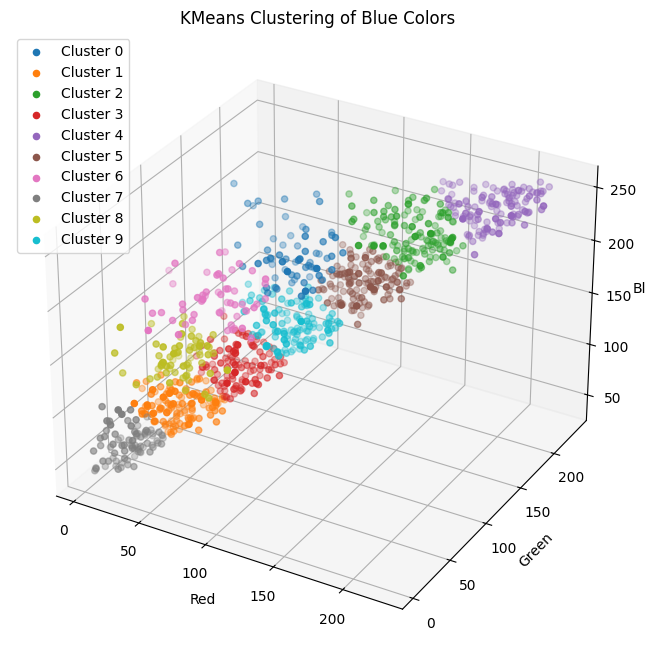

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract data for the "Blue" category
data_blue = df_rgb.loc[df_rgb['Color Category'] == 'Blue'].to_numpy()[:, :-1]

# Apply KMeans clustering
kmeans_blue = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels = kmeans_blue.fit_predict(data_blue)

# Get unique cluster labels and their counts
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster Labels and Counts:", unique_labels, counts)

# Create a 3D scatter plot for the "Blue" category
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a unique color
for label in unique_labels:
    cluster_data = data_blue[cluster_labels == label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {label}')

# Set labels for the axes
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('KMeans Clustering of Blue Colors')

# Add a legend
ax.legend()

# Show the plot
plt.show()

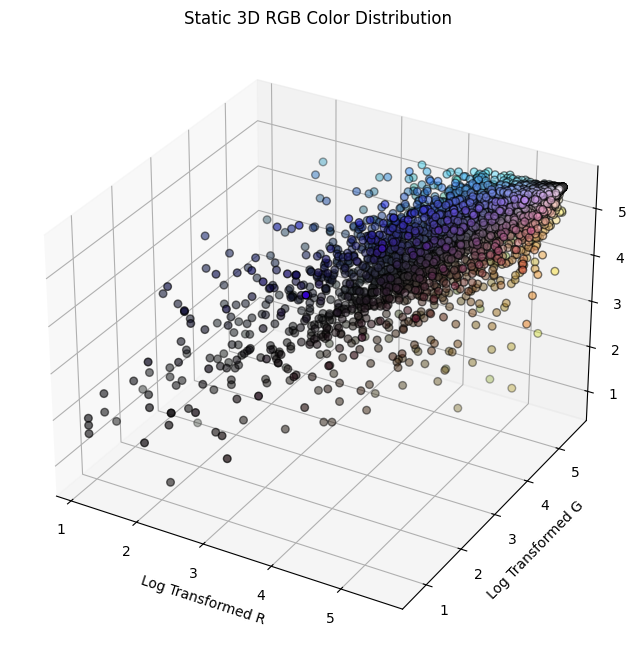

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply log transformation for better separation
df_rgb_transformed = df_rgb.copy()
df_rgb_transformed[['R', 'G', 'B']] = np.log1p(df_rgb[['R', 'G', 'B']])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each color point with its true RGB color
ax.scatter(
    df_rgb_transformed['R'], 
    df_rgb_transformed['G'], 
    df_rgb_transformed['B'], 
    c=df_rgb[['R', 'G', 'B']]/255,  # Normalize RGB values for Matplotlib
    marker='o', s=30, edgecolors='k'
)

# Labels and title
ax.set_xlabel("Log Transformed R")
ax.set_ylabel("Log Transformed G")
ax.set_zlabel("Log Transformed B")
ax.set_title("Static 3D RGB Color Distribution")

plt.show();
